<a href="https://colab.research.google.com/github/anahimaciel/Networks-in-cities/blob/main/Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [101]:
import numpy as np
import pandas as pd

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance

import networkx as nx

import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm

In [127]:
city="Jundiaí"

# Creating datframes

In [128]:
#read df
df = pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/"+city+"/edges.txt",usecols=[1,2,3])
df

,user_from,user_to,weight
0,001FDE5D6ACB677577D7A513AAA2933F,765254184E0149F37F104B609ED62B46,1
1,002F869D60FCC893AC9BEA5535AE3408,C360F1CA2F8DB4313B76D834EB9CA4DF,6
2,0041DD60B3F11D90D32407D1068C5840,BE8BFC9AD37D9E89FB4943968DA1D804,1
3,00F575B0F68C3B92A2F6A9B12D744584,E6C99E78A7468CE01EBADB5E0688CD19,1
4,0104CF6AB7EC1B4582130E36D8919A9A,AA6CF06F5E725D3F022E41B990214D78,1
...,...,...,...
606,FD699CBD30BCD9834316BCC69FB24823,C10706A4E5C8745135947B3C171BA0B6,1
607,FDE0BF7EA528D901A55FA709B78780C5,43C3564DB7F4A3D5ADB93FF59C462CDC,1
608,FF0CF0D425D610AD8D897BFE71BF6B20,83852506433A710C9EC96F289FB491FA,1
609,FF6C101CDD5620453643C6F4BB4D6A48,6E5D0973ADABD1DA9E745BC517490B6C,1


In [129]:
#antennas
map = pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/"+city+"/antennas_"+city+".txt",sep=";")
map=map.groupby(['LAT','LONG']).first().reset_index()         #ignoring antennas with same coordinates
map

,LAT,LONG,CELLID,UF,DDD,CITY,MUNICIPALITY
0,-23.26710,-46.86410,44659,SP,11,Jundiaí,Região Imediata de Jundiaí
1,-23.24693,-46.88376,22188,SP,11,Jundiaí,Região Imediata de Jundiaí
2,-23.24619,-46.85569,44587,SP,11,Jundiaí,Região Imediata de Jundiaí
3,-23.22170,-46.90599,64967,SP,11,Jundiaí,Região Imediata de Jundiaí
4,-23.21665,-46.88650,64829,SP,11,Jundiaí,Região Imediata de Jundiaí
5,-23.21510,-46.86720,64948,SP,11,Jundiaí,Região Imediata de Jundiaí
6,-23.20739,-46.85092,64988,SP,11,Jundiaí,Região Imediata de Jundiaí
7,-23.20304,-46.88876,64928,SP,11,Jundiaí,Região Imediata de Jundiaí
8,-23.20295,-47.00520,44508,SP,11,Jundiaí,Região Imediata de Jundiaí
9,-23.20236,-46.87399,64898,SP,11,Jundiaí,Região Imediata de Jundiaí


In [130]:
#home locations
loc = pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/"+city+"/home_locations.txt",usecols=[1,2,3,4])
loc= loc.drop('antenna',axis=1)
loc=pd.merge(loc,map,how='inner',on=['LAT','LONG'])         #substituting antennas numbers so that we dont have overlapping antennas
loc= loc.drop(['UF','DDD','CITY','MUNICIPALITY'],axis=1)
loc=loc.rename(columns={"CELLID":"antenna"})
loc

,user_from,LAT,LONG,antenna
0,00039B1CBDA2A6B56E41B3E7632A1784,-23.20295,-47.00520,44508
1,0482E00FCDB965ACCBA17913B6CA44CD,-23.20295,-47.00520,44508
2,0905624004FE2EBB56E813EF38E09114,-23.20295,-47.00520,44508
3,0920406DD74F2D4EBE5A05B059A6002B,-23.20295,-47.00520,44508
4,0929E4D78CBC4AC153B55ECF43095264,-23.20295,-47.00520,44508
...,...,...,...,...
14076,E9C21E26881B0B6E916D753D10A1C68E,-23.15675,-46.83645,44567
14077,F14E8C6EE713159153B8E98848F959CC,-23.15675,-46.83645,44567
14078,F1735A0FADD722E602437E60324628D1,-23.15675,-46.83645,44567
14079,F6D01A726B326166CD642D6126CCFD34,-23.15675,-46.83645,44567


# Manipulating dataframes

In [131]:
#edgelist with nodes as antennas
dic_antenna=loc.set_index('user_from')['antenna'].to_dict()

def func(row):
  row.user_from=dic_antenna[row.user_from]
  row.user_to=dic_antenna[row.user_to]
  return row

antenna_df=df.apply(func,axis=1)
antenna_df

,user_from,user_to,weight
0,4389,4389,1
1,64888,64888,6
2,32749,32749,1
3,44609,64967,1
4,4389,4389,1
...,...,...,...
606,44659,44609,1
607,44539,64957,1
608,44587,44659,1
609,64967,44659,1


In [132]:
#ignoring edges from one node to itself
antenna_df=antenna_df.groupby(['user_from','user_to'])['weight'].sum().reset_index()
edges_df=antenna_df[~(antenna_df['user_from'] == antenna_df['user_to'])]
edges_df

,user_from,user_to,weight
1,4389,64928,1
2,4389,64938,1
4,22188,44508,1
5,22188,44577,1
6,22188,64967,1
...,...,...,...
200,64998,44709,3
201,64998,64829,1
202,64998,64888,2
203,64998,64938,11


# Creating and plotting network

<ipython-input-133-787bb86683aa>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


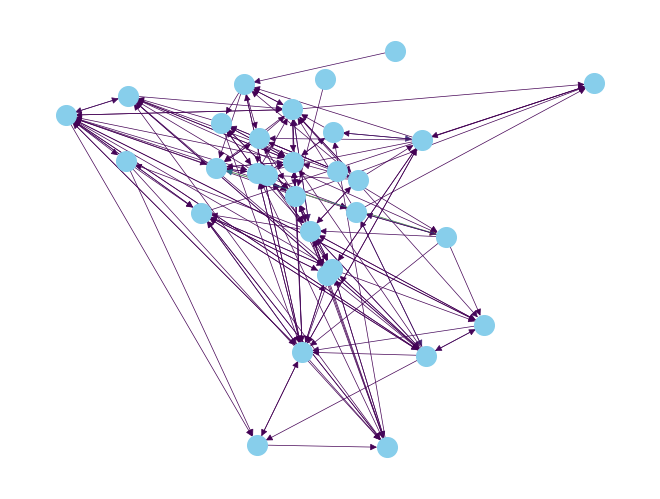

In [133]:
#directed graph
G = nx.DiGraph()

# Add nodes with coordinates
for index, row in map.iterrows():
    G.add_node(row['CELLID'], pos=(row['LAT'], row['LONG']))

# Add edges with weights
for index,row in edges_df.iterrows():
    G.add_edge(row['user_from'], row['user_to'], weight=row['weight'])

# Get weights and positions
edge_weights = nx.get_edge_attributes(G, 'weight')
pos = nx.get_node_attributes(G, 'pos')

# Define colormap
cmap = cm.get_cmap('viridis')

# Norm for edge weights
min_weight = min(edge_weights.values())
max_weight = max(edge_weights.values())
norm = plt.Normalize(vmin=min_weight, vmax=max_weight)

# Draw the network using matplotlib
#nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', edge_color='black', width=[float(edge_weights[edge]) for edge in G.edges()])
nx.draw(G,
        pos,
        with_labels=False,
        node_size=200,            #node size could be function of population in that place
        node_color='skyblue',
        font_size=6,
        edge_color=[cmap(norm(edge_weights[edge])) for edge in G.edges()],
        #width=[float(edge_weights[edge]/10) for edge in G.edges()])
        width=0.5)

plt.show()
